In [2]:
import sys
sys.path.append('../')

In [3]:
import tensorflow as tf
import numpy as np
from default_boxes import *
from utils import images_with_rectangles, plot_images, xywh2xyxy, draw_rectangles

## 32 x 32

In [4]:
fmap = tf.constant(shape=(2, 32, 32, 2), value=1)
n_layer = 7
paddings = ['SAME'] * n_layer
strides = [1, 1, 1, 1, 2, 1, 2]
kernel_sizes = [3] * n_layer
center_xy = original_rectangle_coords((32, 32), kernel_sizes, strides, paddings)[:, :2]

# get w, h
scales = [10]
ratios = [(1, 1),
          (1.5, 0.5),
          (1.2, 0.8),
          (0.8, 1.2),
          (1.4, 1.4)]
sizes = generate_default_boxes(scales, ratios)

# Get default boxes over feature map
default_boxes = tiling_default_boxes(center_xy, sizes)
default_boxes = xywh2xyxy(default_boxes)

In [5]:
n_samples = 32 * 32
sample_default_boxes = default_boxes[:n_samples]

In [6]:
# opencv 는 minus 좌표계를 지원하지 않아서 minus 좌표계는 0으로 변환함
sample_clipped_boxes = np.where(sample_default_boxes >0, sample_default_boxes, 0)

In [7]:
# 좌표 하나에 그려질 모든 anchor을 그린다.
backgrounds = [np.zeros([128, 128, 3])]*n_samples
rected_imgs = images_with_rectangles(backgrounds, sample_clipped_boxes)

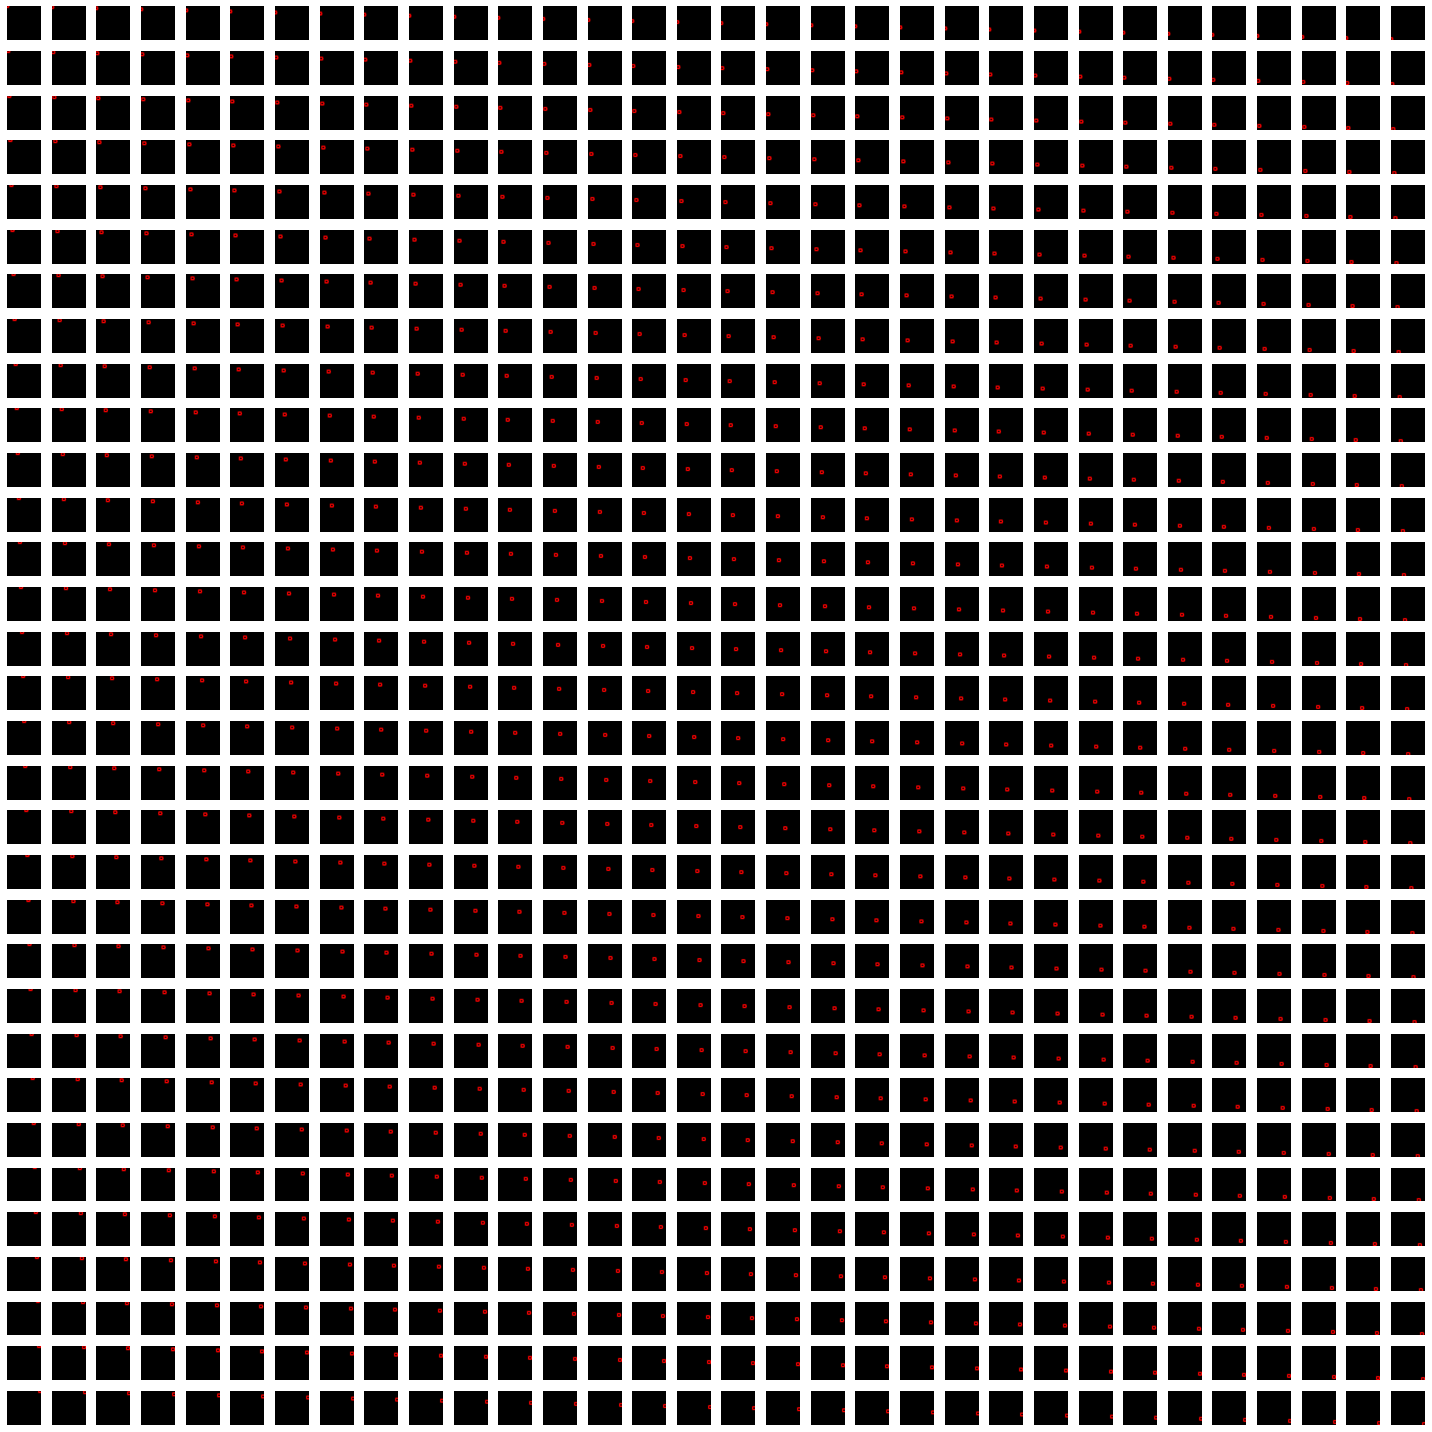

In [8]:
plot_images(rected_imgs)

## 16 x 16

In [9]:
fmap = tf.constant(shape=(2, 16, 16, 2), value=1)
n_layer = 9
paddings = ['SAME'] * n_layer
strides = [1, 1, 1, 1, 2, 1, 2, 1, 2]
kernel_sizes = [3] * n_layer
center_xy = original_rectangle_coords((16, 16), kernel_sizes, strides, paddings)[:, :2]

# get w, h
scales = [20]
ratios = [(1, 1),
          (1.5, 0.5),
          (1.2, 0.8),
          (0.8, 1.2),
          (1.4, 1.4)]
sizes = generate_default_boxes(scales, ratios)

# Get default boxes over feature map
default_boxes = tiling_default_boxes(center_xy, sizes)
default_boxes = xywh2xyxy(default_boxes)

In [10]:
n_samples = 16 * 16
sample_default_boxes = default_boxes[:n_samples]

In [11]:
# opencv 는 minus 좌표계를 지원하지 않아서 minus 좌표계는 0으로 변환함
sample_clipped_boxes = np.where(sample_default_boxes >0, sample_default_boxes, 0)

In [12]:
# 좌표 하나에 그려질 모든 anchor을 그린다.
backgrounds = [np.zeros([128, 128, 3])]*n_samples
rected_imgs = images_with_rectangles(backgrounds, sample_clipped_boxes)

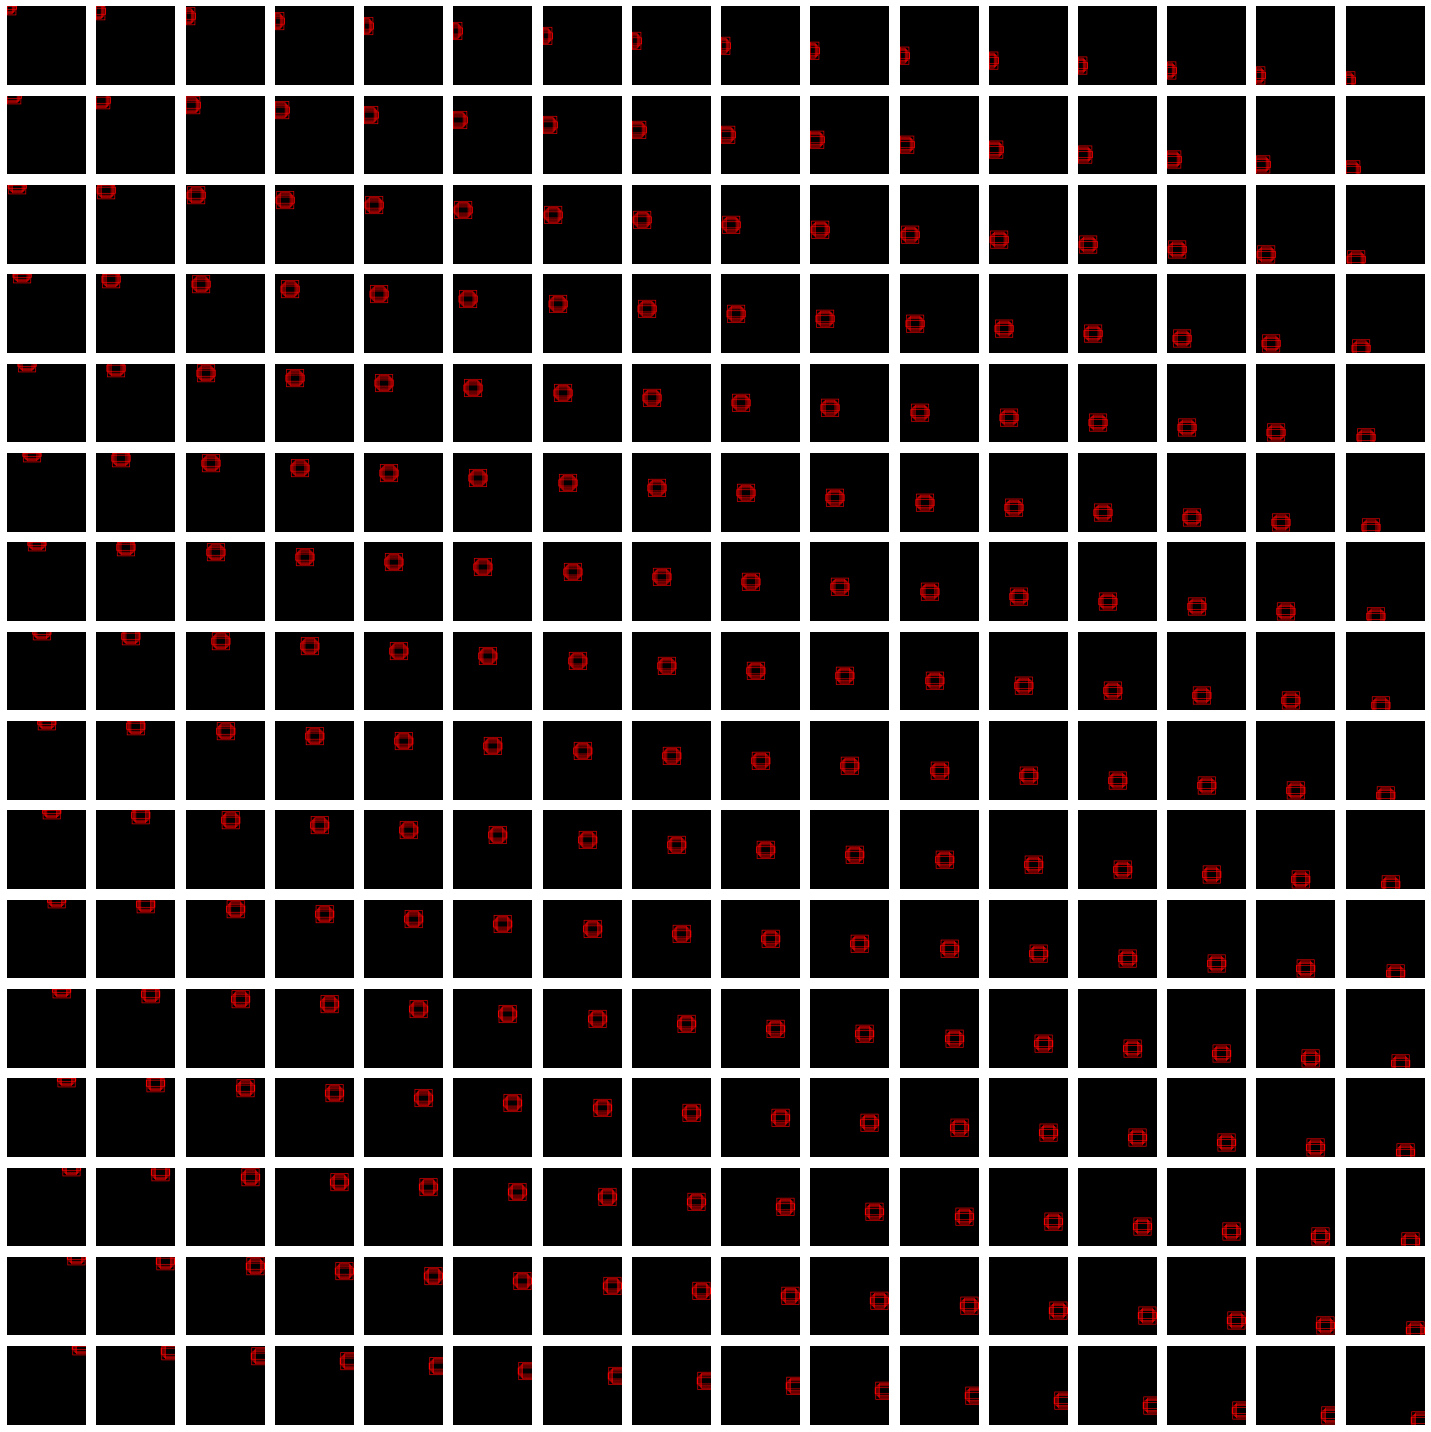

In [13]:
plot_images(rected_imgs)

## 8 x 8

In [14]:
fmap = tf.constant(shape=(2, 8, 8, 2), value=1)
h, w = fmap.get_shape()[1:3]
n_layer = 11
paddings = ['SAME'] * n_layer
strides = [1, 1, 1, 1, 2, 1, 2, 1, 2, 1, 2]
kernel_sizes = [3] * n_layer
center_xy = original_rectangle_coords((h, w), kernel_sizes, strides, paddings)[:, :2]

# get w, h
scales = [30]
ratios = [(1, 1),
          (1.5, 0.5),
          (1.2, 0.8),
          (0.8, 1.2),
          (1.4, 1.4)]
sizes = generate_default_boxes(scales, ratios)

# Get default boxes over feature map
default_boxes = tiling_default_boxes(center_xy, sizes)
default_boxes = xywh2xyxy(default_boxes)

In [15]:
n_samples = h * w
sample_default_boxes = default_boxes[:n_samples]

In [16]:
# opencv 는 minus 좌표계를 지원하지 않아서 minus 좌표계는 0으로 변환함
sample_clipped_boxes = np.where(sample_default_boxes >0, sample_default_boxes, 0)

In [17]:
# 좌표 하나에 그려질 모든 anchor을 그린다.
backgrounds = [np.zeros([128, 128, 3])]*n_samples
rected_imgs = images_with_rectangles(backgrounds, sample_clipped_boxes)

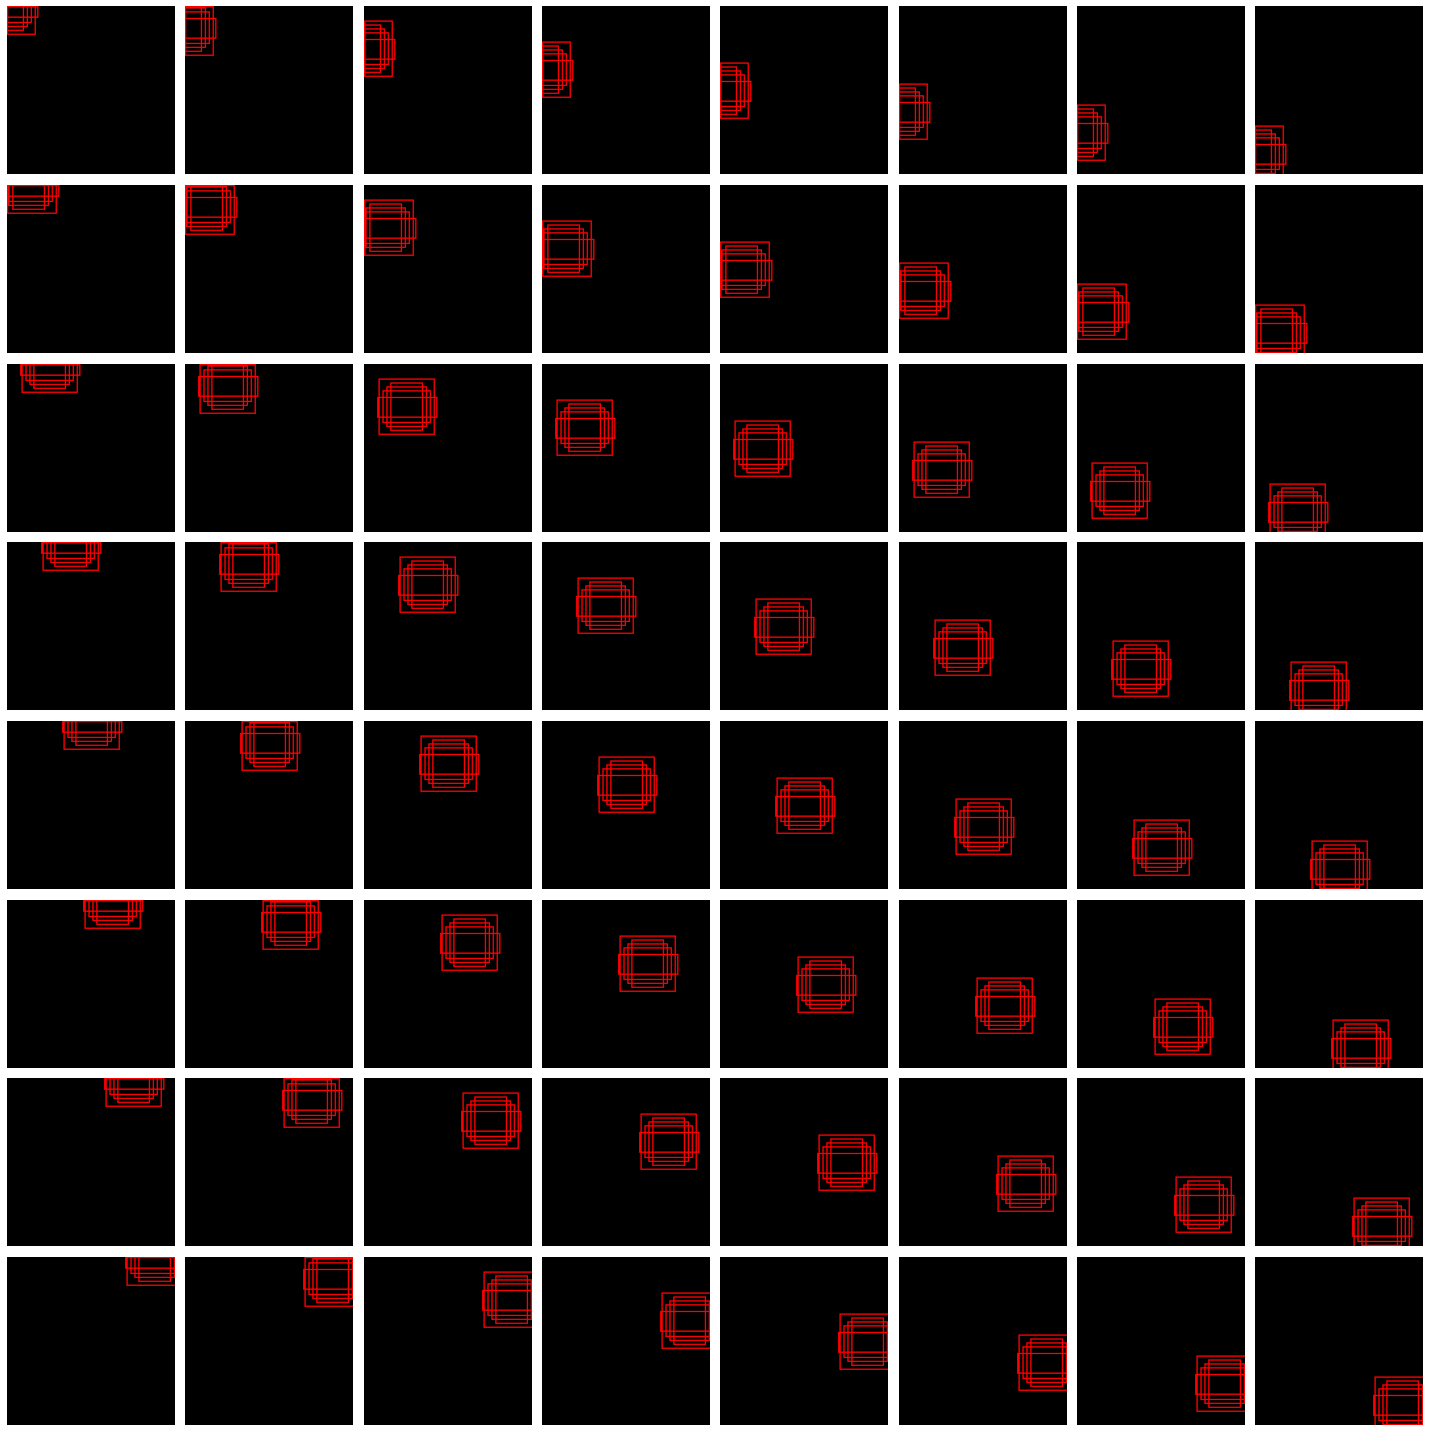

In [18]:
plot_images(rected_imgs)